In [2]:
import os,cv2
import numpy as np
from tensorflow import keras
from imutils import paths
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

categories = list(paths.list_images('Dataset'))

data = []
labels = []

for imagePath in categories:

    label = imagePath.split(os.path.sep)[-2]
    image = load_img(imagePath, target_size=(224, 224))

    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)
    labels.append(label)


np.save('data',data)
np.save('labels',labels)

[INFO] compiling model...
[INFO] training head...
Epoch 1/20
34/34 [==============================] - 68s 2s/step - loss: 0.7554 - accuracy: 0.5498 - val_loss: 0.2718 - val_accuracy: 0.9638
Epoch 2/20
34/34 [==============================] - 58s 2s/step - loss: 0.2546 - accuracy: 0.9690 - val_loss: 0.1330 - val_accuracy: 0.9783
Epoch 3/20
34/34 [==============================] - 59s 2s/step - loss: 0.1289 - accuracy: 0.9909 - val_loss: 0.0841 - val_accuracy: 0.9855
Epoch 4/20
34/34 [==============================] - 58s 2s/step - loss: 0.0928 - accuracy: 0.9823 - val_loss: 0.0592 - val_accuracy: 0.9928
Epoch 5/20
34/34 [==============================] - 60s 2s/step - loss: 0.0651 - accuracy: 0.9924 - val_loss: 0.0480 - val_accuracy: 0.9928
Epoch 6/20
34/34 [==============================] - 56s 2s/step - loss: 0.0508 - accuracy: 0.9948 - val_loss: 0.0397 - val_accuracy: 0.9928
Epoch 7/20
34/34 [==============================] - 56s 2s/step - loss: 0.0463 - accuracy: 0.9920 - val_loss: 

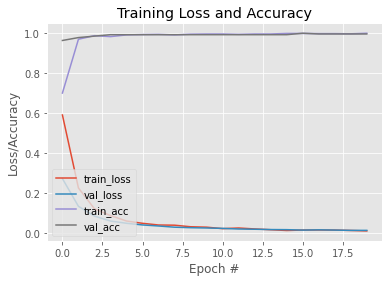

In [6]:
import numpy as np

#넘파이 배열 파일 로드하기
data=np.load('data.npy')
labels=np.load('labels.npy')

from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.applications import MobileNetV2


baseModel = MobileNetV2(weights="imagenet", include_top=False,input_shape=(224, 224, 3))#더 나은 합성곱 모델
#기본 모델 위에 배치할 모델의 헤드 구성
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = False

#model.summary() <<<이걸로 확인

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

aug = ImageDataGenerator(
	rotation_range=20,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

INIT_LR = 1e-4
EPOCHS = 20
BS = 32
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(X_train, Y_train, batch_size=BS),
	steps_per_epoch=len(X_train) // BS,
	validation_data=(X_test, Y_test),
	validation_steps=len(X_test) // BS,
	epochs=EPOCHS)

N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

#모델 저장
from keras.models import load_model

model.save('Final_model.h5')

print("Saved model to disk")


[INFO] compiling model...
[INFO] training head...
Epoch 1/10
34/34 [==============================] - 71s 2s/step - loss: 0.6213 - accuracy: 0.7263 - val_loss: 0.2338 - val_accuracy: 0.9783
Epoch 2/10
34/34 [==============================] - 59s 2s/step - loss: 0.2239 - accuracy: 0.9698 - val_loss: 0.1130 - val_accuracy: 0.9783
Epoch 3/10
34/34 [==============================] - 58s 2s/step - loss: 0.1175 - accuracy: 0.9957 - val_loss: 0.0687 - val_accuracy: 0.9928
Epoch 4/10
34/34 [==============================] - 57s 2s/step - loss: 0.0723 - accuracy: 0.9979 - val_loss: 0.0500 - val_accuracy: 0.9928
Epoch 5/10
34/34 [==============================] - 58s 2s/step - loss: 0.0469 - accuracy: 0.9975 - val_loss: 0.0394 - val_accuracy: 0.9928
Epoch 6/10
34/34 [==============================] - 58s 2s/step - loss: 0.0489 - accuracy: 0.9920 - val_loss: 0.0329 - val_accuracy: 0.9964
Epoch 7/10
34/34 [==============================] - 57s 2s/step - loss: 0.0346 - accuracy: 0.9979 - val_loss: 

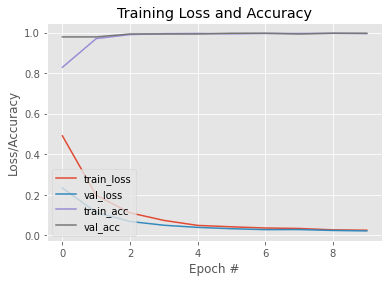

In [7]:
import numpy as np

#넘파이 배열 파일 로드하기
data=np.load('data.npy')
labels=np.load('labels.npy')

from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.applications import MobileNetV2


baseModel = MobileNetV2(weights="imagenet", include_top=False,input_shape=(224, 224, 3))#더 나은 합성곱 모델
#기본 모델 위에 배치할 모델의 헤드 구성
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = False

#model.summary() <<<이걸로 확인

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

aug = ImageDataGenerator(
	rotation_range=20,
	horizontal_flip=True,
	fill_mode="nearest")

INIT_LR = 1e-4
EPOCHS = 10
BS = 32
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(X_train, Y_train, batch_size=BS),
	steps_per_epoch=len(X_train) // BS,
	validation_data=(X_test, Y_test),
	validation_steps=len(X_test) // BS,
	epochs=EPOCHS)

N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

#모델 저장
from keras.models import load_model

model.save('mask_model.h5')

print("Saved model to disk")
